Bean There Done That is a small-sized coffee roaster in the Netherlands, with an annual output of ±1,000 tonnes and <1% domestic market share. Despite offering premium specialty coffee, the company struggles to grow and needs to assess whether its operations and business model are ready to scale.  The challenge now is to evaluate whether current operations can sustainably handle renewed growth, and to identify bottlenecks in sourcing, production, and distribution. 

How can the company improve efficiency and scalability while maintaining premium quality, to grow in a highly competitive market? 

Roaster Utilization Rate (% of max capacity used) 
Shows if production capacity can handle more demand or if new investments are required. Production_kg / Max_possible_kg. 
Supplier Reliability (% on-time deliveries) 
Inventory Turnover (times stock is renewed yearly) 
On-Time Delivery Rate (% delivered as promised) 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Bean there done that data(E-com sales orders by product).csv', sep=';', encoding='latin1', engine='python')
print(df.head())


        Product  Bag type  Quantity       Value  Order date Delivery date  \
0    Dark Roast         2        11    126,39   01-01-2023    02-01-2023   
1    Dark Roast         2         6     68,94   01-01-2023    02-01-2023   
2    Dark Roast         2         3     34,47   01-01-2023    02-01-2023   
3  Medium Roast         2        10    129,50   01-01-2023    02-01-2023   
4    Dark Roast         2         5     57,45   01-01-2023    02-01-2023   

  Delivery fee Shipping costs Ship to (province)  Unnamed: 9  
0        -            6,75        Zuid-Holland         NaN  
1        -            6,75          Overijssel         NaN  
2       4,95          6,75             Limburg         NaN  
3        -            6,75           Flevoland         NaN  
4        -            6,75           Friesland         NaN  


In [6]:
print(df.columns)
print(df.head())
print(df.info())


Index(['Product', 'Bag type', 'Quantity', 'Value', 'Order date',
       'Delivery date', 'Delivery fee', 'Shipping costs', 'Ship to (province)',
       'Unnamed: 9'],
      dtype='object')
        Product  Bag type  Quantity       Value  Order date Delivery date  \
0    Dark Roast         2        11    126,39   01-01-2023    02-01-2023   
1    Dark Roast         2         6     68,94   01-01-2023    02-01-2023   
2    Dark Roast         2         3     34,47   01-01-2023    02-01-2023   
3  Medium Roast         2        10    129,50   01-01-2023    02-01-2023   
4    Dark Roast         2         5     57,45   01-01-2023    02-01-2023   

  Delivery fee Shipping costs Ship to (province)  Unnamed: 9  
0        -            6,75        Zuid-Holland         NaN  
1        -            6,75          Overijssel         NaN  
2       4,95          6,75             Limburg         NaN  
3        -            6,75           Flevoland         NaN  
4        -            6,75     

In [7]:
import re

def clean_money(val):
    if isinstance(val, str):
        # Remove euro sign, spaces, and handle negatives or missing
        val = re.sub(r'[^\d,.-]', '', val)
        # Replace comma with dot for European decimals
        val = val.replace(',', '.')
        # Default empty or dash to zero
        if val in ['', '-', '.', ',']:
            return 0.0
        try:
            return float(val)
        except:
            return 0.0
    return val

df['Value'] = df['Value'].apply(clean_money)


In [8]:
df = df.drop(columns=['Unnamed: 9'])

print(df.isnull().sum())


Product               0
Bag type              0
Quantity              0
Value                 0
Order date            0
Delivery date         0
Delivery fee          0
Shipping costs        0
Ship to (province)    0
dtype: int64


In [9]:
df['Order date'] = pd.to_datetime(df['Order date'], format='%d-%m-%Y')
df['Delivery date'] = pd.to_datetime(df['Delivery date'], format='%d-%m-%Y')


In [10]:
df['Bag type'] = df['Bag type'].astype(str)


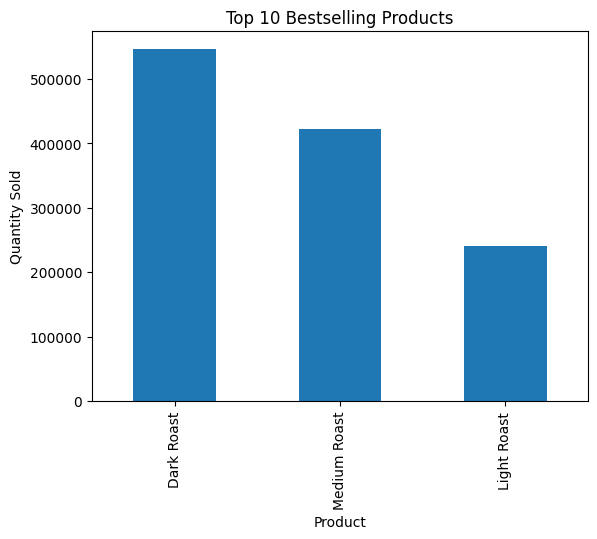

In [11]:
df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(10).plot(kind="bar", title="Top 10 Bestselling Products")
plt.ylabel("Quantity Sold")
plt.show()


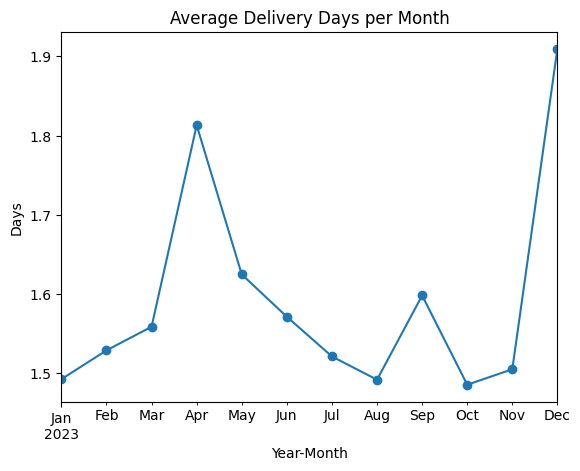

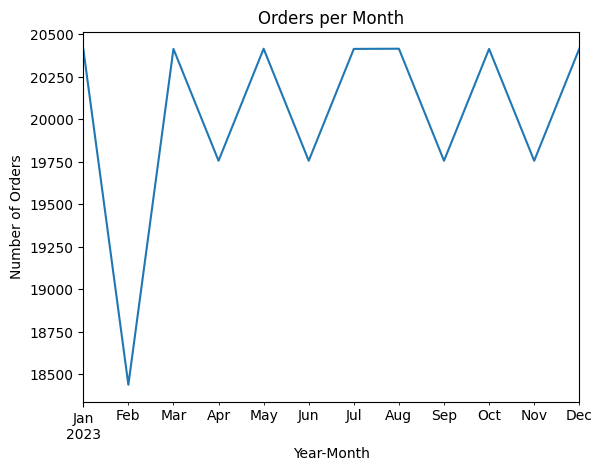

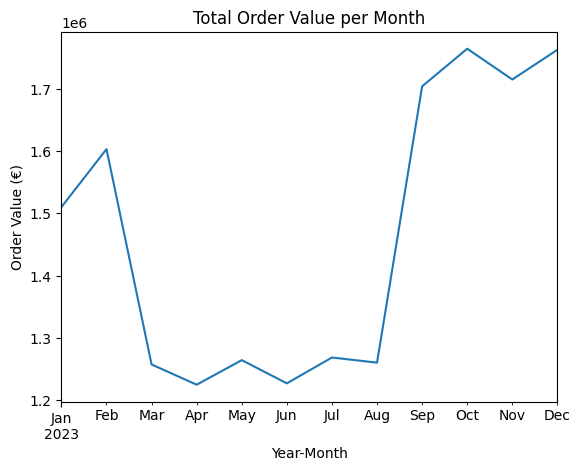

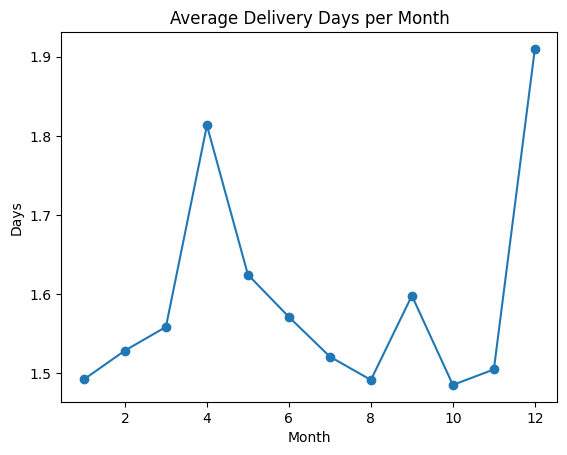

In [12]:
df['Month'] = df['Order date'].dt.month
df['Year'] = df['Order date'].dt.year
df['YearMonth'] = df['Order date'].dt.to_period('M')

df['Delivery_days'] = (df['Delivery date'] - df['Order date']).dt.days

avg_delivery_days = df.groupby('YearMonth')['Delivery_days'].mean()
avg_delivery_days.plot(kind="line", marker="o", title="Average Delivery Days per Month")
plt.ylabel("Days")
plt.xlabel("Year-Month")
plt.show()


orders_per_month = df.groupby('YearMonth').size()
orders_per_month.plot()
plt.title('Orders per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.show()

value_per_month = df.groupby('YearMonth')['Value'].sum()
value_per_month.plot()
plt.title('Total Order Value per Month')
plt.xlabel('Year-Month')
plt.ylabel('Order Value (€)')
plt.show()


df.groupby("Month")["Delivery_days"].mean().plot(kind="line", marker="o", title="Average Delivery Days per Month")
plt.ylabel("Days")
plt.show()


           Product Bag type       Quantity          Value  \
count       240352   240352  240352.000000  240352.000000   
unique           3        2            NaN            NaN   
top     Dark Roast        2            NaN            NaN   
freq        108370   168143            NaN            NaN   
mean           NaN      NaN       5.027922      73.064588   
min            NaN      NaN       1.000000      22.980000   
25%            NaN      NaN       3.000000      45.960000   
50%            NaN      NaN       4.000000      68.940000   
75%            NaN      NaN       7.000000      92.750000   
max            NaN      NaN      12.000000     159.000000   
std            NaN      NaN       2.813451      35.502164   

                           Order date                  Delivery date  \
count                          240352                         240352   
unique                            NaN                            NaN   
top                               NaN              

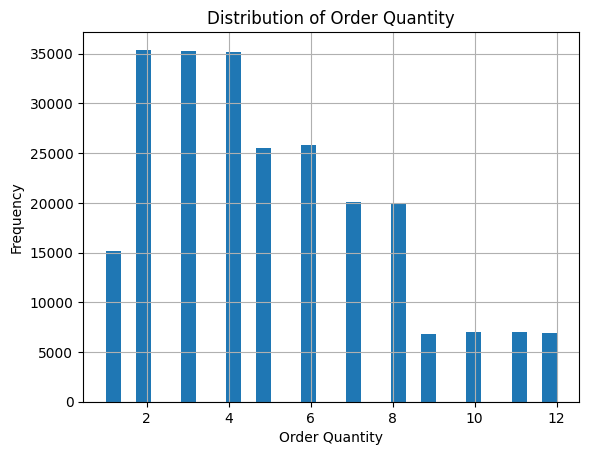

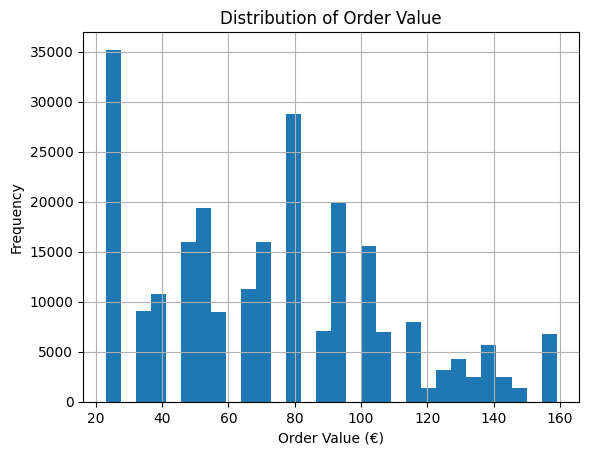

In [13]:
print(df.describe(include='all'))  # Quick summary for all columns
df['Quantity'].hist(bins=30)
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantity')
plt.show()

df['Value'].hist(bins=30)
plt.xlabel('Order Value (€)')
plt.ylabel('Frequency')
plt.title('Distribution of Order Value')
plt.show()


/tmp/ipykernel_2038/3540372526.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_per_month = df.groupby(pd.Grouper(key='Order date', freq='M'))['Product'].count()


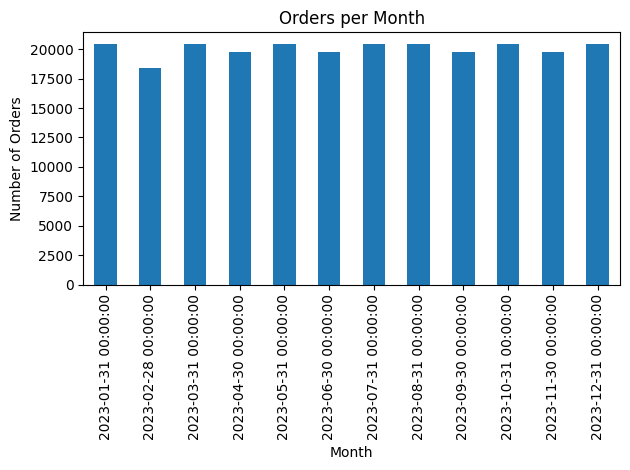

In [14]:

orders_per_month = df.groupby(pd.Grouper(key='Order date', freq='M'))['Product'].count()
orders_per_month.plot(kind='bar')
plt.title('Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()




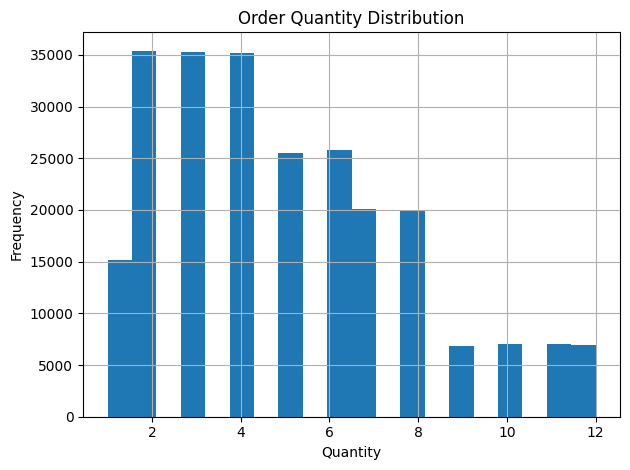

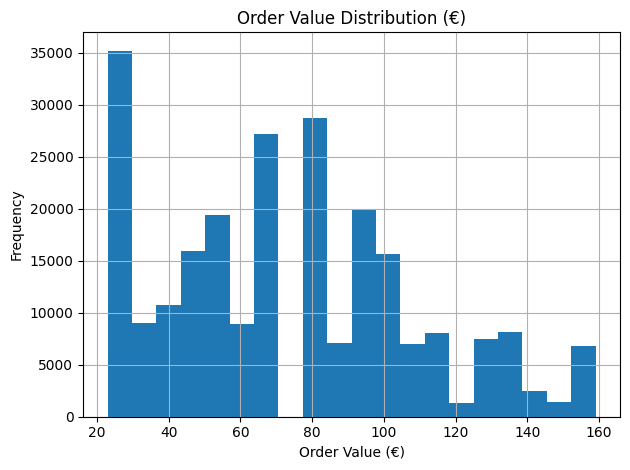

In [15]:
df['Quantity'].hist(bins=20)
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

df['Value'].hist(bins=20)
plt.title('Order Value Distribution (€)')
plt.xlabel('Order Value (€)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [16]:
!pip install geopandas
!pip install matplotlib  # If not already installed




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file('geoBoundaries-NLD-ADM1.geojson')
print(gdf.columns)  # Check column names for province names
print(gdf['shapeName'].head())  # Usually 'shapeName' contains province names in geoBoundaries


Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')
0     Groningen
1       Drenthe
2       Utrecht
3     Flevoland
4    Overijssel
Name: shapeName, dtype: object


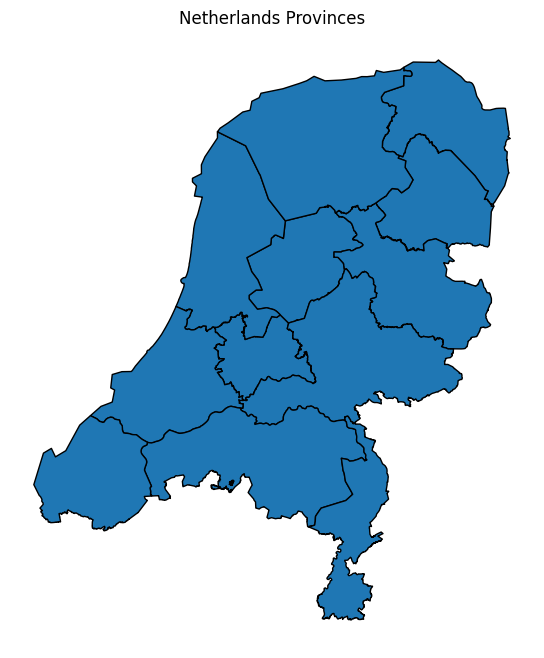

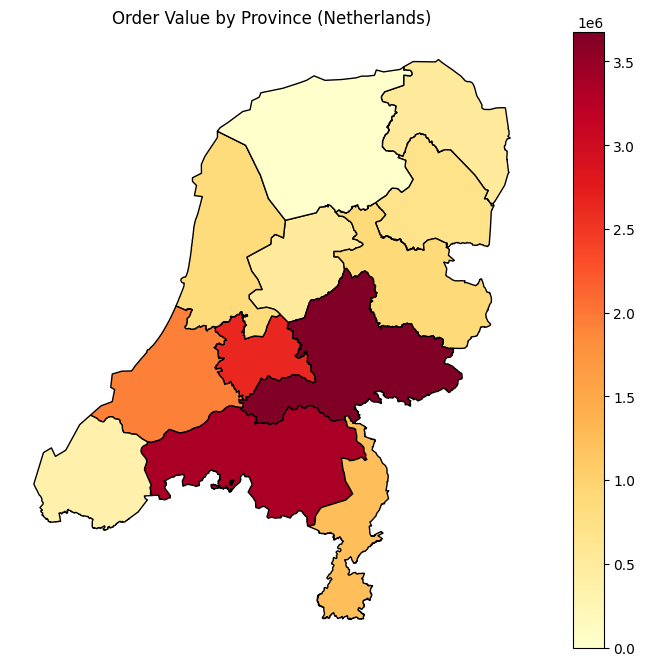

In [20]:
import matplotlib.pyplot as plt

gdf.plot(edgecolor='black', figsize=(10,8))
plt.title('Netherlands Provinces')
plt.axis('off')
plt.show()

order_value_province = df.groupby('Ship to (province)')['Value'].sum().reset_index()
order_value_province.columns = ['province', 'order_value']

gdf = gdf.merge(order_value_province, left_on='shapeName', right_on='province', how='left')
gdf['order_value'] = gdf['order_value'].fillna(0)

gdf.plot(column='order_value', cmap='YlOrRd', legend=True, edgecolor='black', figsize=(10,8))
plt.title('Order Value by Province (Netherlands)')
plt.axis('off')
plt.show()
